# Admission Numbers

- CSS/00099/022
- CSS/00072/021

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lab 2
These exercises focus on Pandas. Work through all exercises, searching for help when you need to (ie. frequently).

In [2]:
import pandas as pd

__EXERCISE 2: NYC housing__

_Objective: clean and manipulate a real-world dataset_

We are using the PLUTO (Primary Land Use Tax Lot Output) database, which lists every building in New York City.
Source is [NYC Open Data Portal](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). Check the [data dictionary](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v2beta).

In [3]:
url = 'pluto_shorter.csv'
df = pd.read_csv(url)

/tmp/ipykernel_8490/3945322138.py:2: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


__Step 1: Inspect and prepare the dataset__

In [4]:
# Use df.head() to see the first five rows. A bit messy, no?
df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [5]:
# We'll select some columns to keep
df.columns

Index(['Unnamed: 0', 'borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010',
       'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healtharea', 'sanitboro', 'sanitsub', 'address', 'zonedist1',
       'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2',
       'spdist1', 'spdist2', 'spdist3', 'ltdheight', 'splitzone', 'bldgclass',
       'landuse', 'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exemptland', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'histdist', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl',
       'condono', 'tract2010', 'xcoord', 'ycoord'

In [6]:
# Note how this syntax works. You could add extra columns that interest you.
my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'assesstot', 'xcoord','ycoord']
df = df[my_cols]

In [7]:
# Cleaner now, right?
df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,BX,0.00,0.0,7.0,NaN,59400.0,1044510.0,246734.0
1,QN,2.50,1925.0,1.0,11357.0,29738.0,1035479.0,223657.0
2,BK,2.75,1920.0,1.0,11208.0,27370.0,1015989.0,187871.0
3,MN,6.00,1900.0,2.0,10025.0,510300.0,994273.0,228915.0
4,QN,2.00,1901.0,1.0,11421.0,29020.0,1021269.0,190793.0


In [8]:
# Here is the key that translates NYC's land use codes into plain English (p. 17 of the data dictionary)
# We'll use the df.map() method to replace the numbers with text we can understand

# BONUS POINTS: repeat this step to substitute the short borough names (eg. MN) with the actual
# full borough names (eg. MN becomes Manhattan).

land_use_dict = {1: 'One & Two Family Buildings',
                2: 'Multi-Family Walk-Up Buildings',
                3: 'Multi-Family Elevator Buildings',
                4: 'Mixed Residential & Commercial Buildings',
                5: 'Commercial & Office Buildings',
                6: 'Industrial & Manufacturing',
                7: 'Transportation & Utility',
                8: 'Public Facilities & Institutions',
                9: 'Open Space & Outdoor Recreation',
                10: 'Parking Facilities',
                11: 'Vacant Land'}

df['landuse'] = df['landuse'].map(land_use_dict)

In [9]:
borough_dict = {
    'BX': 'Bronx',
    'QN': 'Queens',
    'BK': 'Brooklyn',
    'MN': 'Manhattan',
    'SI': 'Staten Island'
}
df['borough'] = df['borough'].map(borough_dict)

In [10]:
# Cleaner now, right? Add any more data cleaning steps of your choice.

df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,Bronx,0.00,0.0,Transportation & Utility,NaN,59400.0,1044510.0,246734.0
1,Queens,2.50,1925.0,One & Two Family Buildings,11357.0,29738.0,1035479.0,223657.0
2,Brooklyn,2.75,1920.0,One & Two Family Buildings,11208.0,27370.0,1015989.0,187871.0
3,Manhattan,6.00,1900.0,Multi-Family Walk-Up Buildings,10025.0,510300.0,994273.0,228915.0
4,Queens,2.00,1901.0,One & Two Family Buildings,11421.0,29020.0,1021269.0,190793.0


__Step 2: Summarize data using mean(), min/max(), describe() etc.__
* Find out the average price of a building in Manhattan (MN) compared with Queens (QN)
* What was the most expensive building built in the year you were born?
* Compare average building

BONUS: find the average price for buildings in Brooklyn with 5-10 floors built between 2000-2010. Do the same for buildings in Manhattan and Queens with those characteristics.

In [11]:
# YOUR CODE HERE:
# YOUR CODE HERE:

# Summarize data
summary = df.describe()
print("Data Summary:")
print(summary)





Data Summary:
          numfloors     yearbuilt       zipcode     assesstot        xcoord  \
count  42920.000000  42930.000000  41900.000000  4.293000e+04  4.289800e+04   
mean       2.318661   1840.345399  11014.136444  4.399900e+05  1.005958e+06   
std        1.892977    431.111239    469.809609  5.283664e+06  3.260085e+04   
min        0.000000      0.000000  10001.000000  0.000000e+00  9.137740e+05   
25%        2.000000   1920.000000  10466.000000  2.370025e+04  9.893450e+05   
50%        2.000000   1930.000000  11221.000000  3.122700e+04  1.008877e+06   
75%        2.500000   1955.000000  11369.000000  4.794000e+04  1.028986e+06   
max       58.000000   2019.000000  11694.000000  4.954896e+08  1.067207e+06   

              ycoord  
count   42898.000000  
mean   191440.718751  
std     30780.209743  
min    121045.000000  
25%    168031.000000  
50%    189204.500000  
75%    211083.750000  
max    271831.000000  


In [12]:
# Average price of buildings in Manhattan and Queens
avg_price_manhattan = df[df['borough'] == 'Manhattan']['assesstot'].mean()
avg_price_queens = df[df['borough'] == 'Queens']['assesstot'].mean()

print("\nAverage price of a building in Manhattan:", avg_price_manhattan)
print("Average price of a building in Queens:", avg_price_queens)

#most expensive building built in the year you were born?
year_of_birth = 2003
most_expensive_building = df[df['yearbuilt'] == year_of_birth]['assesstot'].max()

print(f"\nMost expensive building built in {year_of_birth}:", most_expensive_building)


Average price of a building in Manhattan: 5361806.129417164
Average price of a building in Queens: 161665.81471389646

Most expensive building built in 2003: 25343553.0


In [13]:
#Compare average prices of buildings

# Brooklyn with 5-10 floors, built between 2000-2010
brooklyn_avg = df[(df['borough'] == 'Brooklyn') & 
                  (df['numfloors'] >= 5) & 
                  (df['numfloors'] <= 10) & 
                  (df['yearbuilt'] >= 2000) & 
                  (df['yearbuilt'] <= 2010)]['assesstot'].mean()

# Manhattan with 5-10 floors, built between 2000-2010
manhattan_avg = df[(df['borough'] == 'Manhattan') & 
                   (df['numfloors'] >= 5) & 
                   (df['numfloors'] <= 10) & 
                   (df['yearbuilt'] >= 2000) & 
                   (df['yearbuilt'] <= 2010)]['assesstot'].mean()

# Queens with 5-10 floors, built between 2000-2010
queens_avg = df[(df['borough'] == 'Queens') & 
                (df['numfloors'] >= 5) & 
                (df['numfloors'] <= 10) & 
                (df['yearbuilt'] >= 2000) & 
                (df['yearbuilt'] <= 2010)]['assesstot'].mean()

print("\nAverage price for buildings in Brooklyn with 5-10 floors built between 2000-2010:", brooklyn_avg)
print("Average price for buildings in Manhattan with 5-10 floors built between 2000-2010:", manhattan_avg)
print("Average price for buildings in Queens with 5-10 floors built between 2000-2010:", queens_avg)


Average price for buildings in Brooklyn with 5-10 floors built between 2000-2010: 2225754.603448276
Average price for buildings in Manhattan with 5-10 floors built between 2000-2010: 4267863.0869565215
Average price for buildings in Queens with 5-10 floors built between 2000-2010: 2035399.652173913


__Step 3: Exploratory visualization using Pandas plotting__

In [14]:
# Try using the function pandas.Series.value_counts
# It returns the unique count of values in a column
# BONUS: Could you produce this output only for Brooklyn?

df.landuse.value_counts()

landuse
One & Two Family Buildings                  28259
Multi-Family Walk-Up Buildings               6408
Mixed Residential & Commercial Buildings     2813
Vacant Land                                  1358
Commercial & Office Buildings                1060
Multi-Family Elevator Buildings               639
Public Facilities & Institutions              633
Industrial & Manufacturing                    544
Parking Facilities                            520
Transportation & Utility                      351
Open Space & Outdoor Recreation               231
Name: count, dtype: int64

In [15]:
# Count all unique values in 'landuse' column across all boroughs
landuse_counts_all = df['landuse'].value_counts()
print("Land Use Counts for All Boroughs:")
print(landuse_counts_all)

# Count for unique values in 'landuse' column only for Brooklyn
landuse_counts_brooklyn = df[df['borough'] == 'Brooklyn']['landuse'].value_counts()
print("\nLand Use Counts for Brooklyn:")
print(landuse_counts_brooklyn)

Land Use Counts for All Boroughs:
landuse
One & Two Family Buildings                  28259
Multi-Family Walk-Up Buildings               6408
Mixed Residential & Commercial Buildings     2813
Vacant Land                                  1358
Commercial & Office Buildings                1060
Multi-Family Elevator Buildings               639
Public Facilities & Institutions              633
Industrial & Manufacturing                    544
Parking Facilities                            520
Transportation & Utility                      351
Open Space & Outdoor Recreation               231
Name: count, dtype: int64

Land Use Counts for Brooklyn:
landuse
One & Two Family Buildings                  7899
Multi-Family Walk-Up Buildings              3192
Mixed Residential & Commercial Buildings    1270
Vacant Land                                  292
Commercial & Office Buildings                277
Industrial & Manufacturing                   216
Public Facilities & Institutions             202


__YOUR ACTION__: Look up the [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) function, and some [examples of how to use it](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Explore any questions that interest you about New York City's buildings by plotting charts, for example:
* How does price vary with age? (scatter of age vs. price)
* Does the breakdown of building types differ between boroughs? (pie chart of landuse)
* Which zip codes have most and fewest buildings?
* Where are the buildings located? (hint: try a scatter plot of xcoord and ycoord)


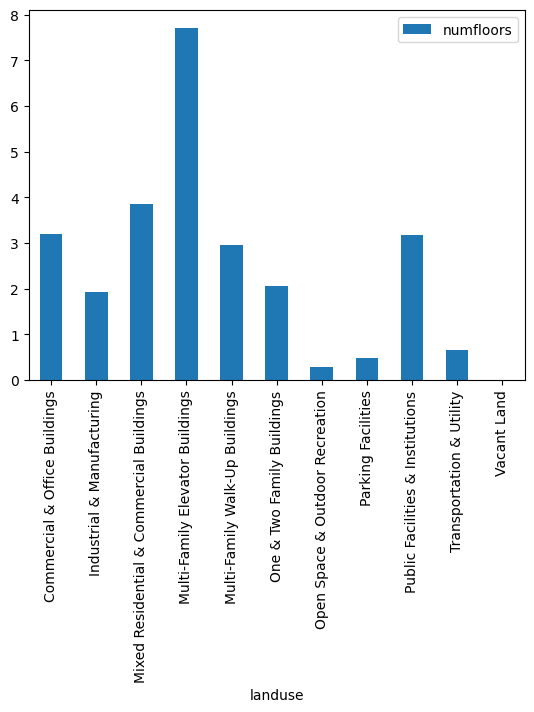

In [17]:
#QUestion1
bb= df[['numfloors','landuse']].groupby('landuse').mean()
bb.plot.bar();

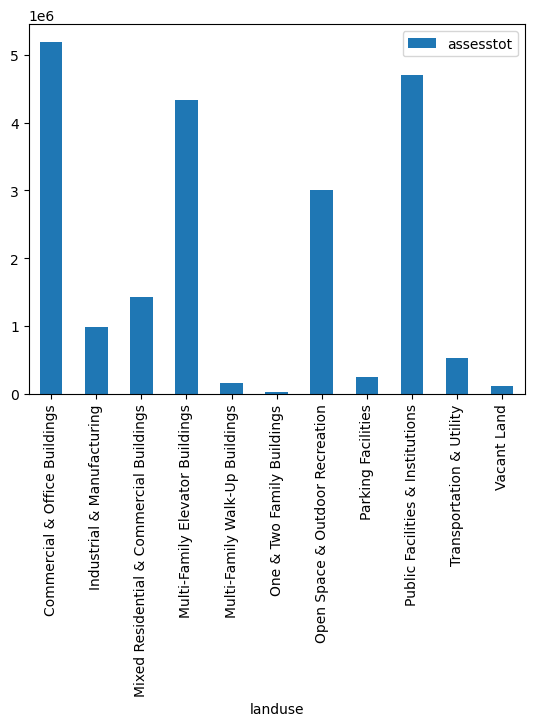

In [18]:
#Question2
bb= df[['assesstot','landuse']].groupby('landuse').mean()
bb.plot.bar();

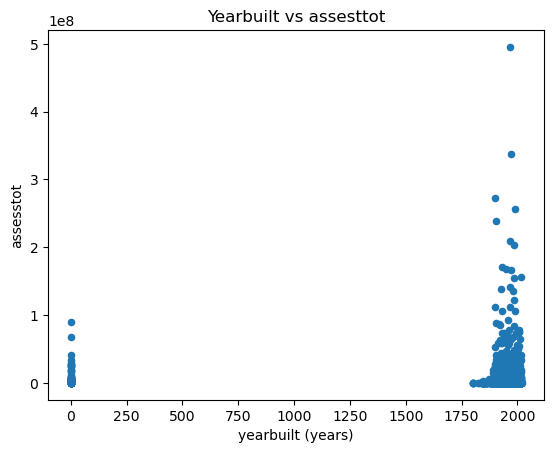

In [19]:
#Question 3

df.plot(kind='scatter', x='yearbuilt', y='assesstot', title='Yearbuilt vs assesttot')
plt.xlabel('yearbuilt (years)')
plt.ylabel('assesstot')
plt.show()

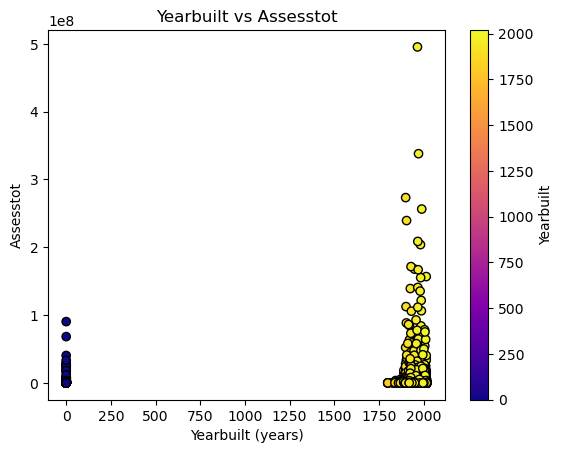

In [24]:
# Plotting the scatter plot
scatter = plt.scatter(
    df['yearbuilt'], 
    df['assesstot'], 
    c=df['yearbuilt'],  # Color based on 'yearbuilt'
    cmap='plasma',      # Use a colormap
    edgecolor='k'       # Add an edge color for better visibility
)

plt.title('Yearbuilt vs Assesstot')
plt.xlabel('Yearbuilt (years)')
plt.ylabel('Assesstot')

# Add a colorbar
plt.colorbar(scatter, label='Yearbuilt')

plt.show()